%%html
<style>
    table {
        display: inline-block
    }
</style>

 | | |
 |---|---|
 | Schedule: | 23-Nov-2023 |
 | Version: | 1.0 |
 | Course: | Decision Tree|
 | Instructor: |Vineet Kumar Maheshwari|

# Agenda

* Basic concepts
 + Decision Tree
 + Entropy, Information Gain, Gini ratio
* Building classifier
* Model Evaluation
* Challenges e.g. Overfitting
* Rules and Pruning
* Dealing with continuous variables
* Sneak preview into advance topics (next session)
* Quiz

## Pre-requisites

* Python Programming
* Access to python notebook application (Jupyter, Google colab)
* Packages installed:
  + pandas
  + scikit-learn
  + matplotlib
 


# Basic Concepts

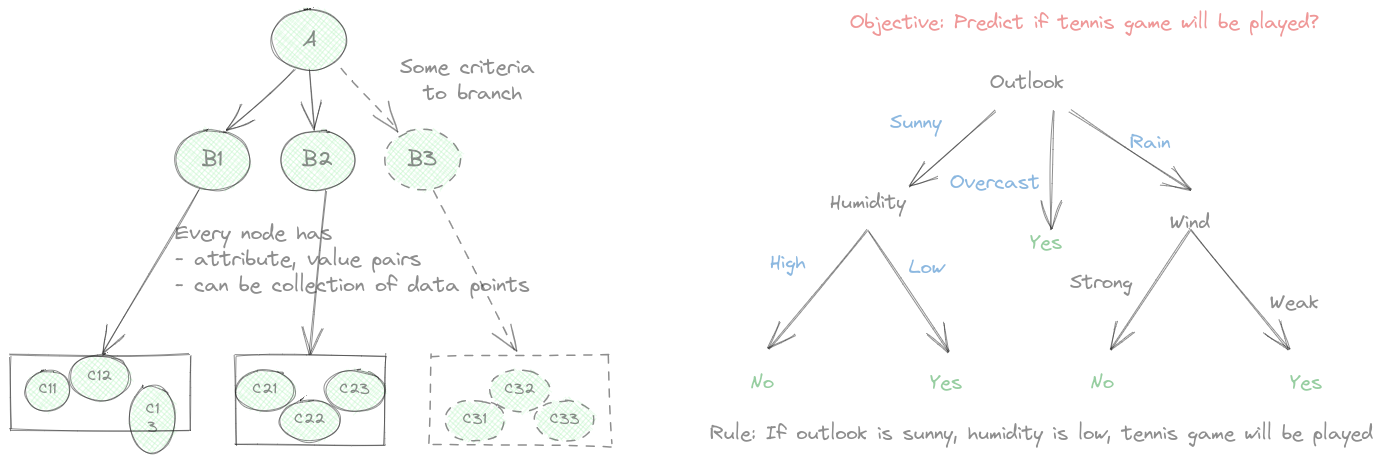

And there can be more than one rules from a tree.

# What else?

Lets map it to programming..

* Every node represents collection of data points capturing same measurable variables
* Every node represents this collection and a feature on which you test a condition (to generate a rule)
* Condition is represented through arrows
* Test results into groups of these data points
* Each group can signify an outcome or we can go further deep with another measurable variable in these sub-groups



# Imports

In [21]:
#!pip install pandas

In [22]:
import pandas as pd
import numpy as np


# Data
This data can be loaded in many ways. Keeping it simple for now to focus on concept.

Here we have:
* 3 features
  + outlook
  + humidity
  + wind
* 7 data points. Also referred as examples, samples

In [29]:
outlook = np.array(["sunny", "sunny", "sunny", "sunny", "rain", "rain", "overcast", "overcast"])
humidity = np.array(["low", "high", "low", "high", "low", "low", "low", "high"])
wind = np.array(["weak", "weak", "strong", "strong", "strong", "strong", "weak", "strong"])
df = pd.DataFrame({"outlook": outlook, "humidity": humidity, "wind": wind})

In [30]:
df.head()

,outlook,humidity,wind
0,sunny,low,weak
1,sunny,high,weak
2,sunny,low,strong
3,sunny,high,strong
4,rain,low,strong


In [31]:
df.shape

(8, 3)

### We are missing the target variable. What we want to know?

That is whether the tennis game would be played or not? Let us add that.

In [32]:
df['play_game'] = np.array(['Yes', 'No', 'Yes', 'No', 'No', 'Yes','Yes', 'Yes'])

In [36]:
df.head(15)

,outlook,humidity,wind,play_game
0,sunny,low,weak,Yes
1,sunny,high,weak,No
2,sunny,low,strong,Yes
3,sunny,high,strong,No
4,rain,low,strong,No
5,rain,low,strong,Yes
6,overcast,low,weak,Yes
7,overcast,high,strong,Yes


In [34]:
df.shape

(8, 4)

### Notes
Above data exactly captures the rules that we had drawn. This may or may not be true in real life. 
For example team decides to go ahead even if it is high humidity on sunny day, if there is strong wind.

Also, there can be other features not considred here which can affect the final play decision.

# Make a decision tree that helps to predict

In [ ]:
class Node():
    attribute = None
    partitions = [] # array of child nodes mapped to different values of this node
    
def train_decision_tree():
    
    pass
    
def predict():
    pass
    

# But before that.. lets understand some metrics

These are important to evaluate if our model is trained well

## Entropy

## Information gain

## Gini index

# Useful references

|||
|---|---|
| Programming example | https://www.w3schools.com/python/python_ml_decision_tree.asp |
| Another example | https://www.geeksforgeeks.org/decision-tree-implementation-python/ |